# Handling mislabeled training data for classification

### TAMU 689-Stat Computing Course Project (https://longjp.github.io/statcomp/)

### What is mislabeled data?

- Data for classification problems in supervised learning, usually consists of a set of feature attributes and a class attribute.

Tranining Data Point:  $(x_1, x_2, x_3, …, x_n, y)$
A data point is considered *mislabeled* if class y is incorrect. Eg. lets say we want to classify images whether the image is of dog or cat. If image is of cat, we say the class as 1. Following is the training data:

![title](img/cat_classification.png)

In above data, we can see that, there is one data point which is incorrectly labeled, i.e. white puppy, 2nd from right, is labeled as cat.

### Reasons for Mislabeling data

Following are the main reasons of why mislabeling happens in the training data:

- **Subjectivity**: It can arise when observations need to be ranked in some way such as disease severity or when the information used to classify object is different from information to which learning algorithm have access. Eg. experts labeling the images, they normally use their visual input rather than each pixel of the image. 
- **Data Entry Error**: It can arise when the training dataset is prepared due to manual error.
- **Inadequate Information**: It can arise when the information used to label each information is insufficient. Eg. in medical diagnosis, it is almost impossible to guarantee that a diagnosis is 100% accurate.

### Methods for handling Mislabeling

- **Noise Elimination**: In this approach, mislabeled data points are removed and then learning classifier is applied on the remaining dataset.
- **Noise Tolerance**: In this approach, mislabeled data points are not removed and the learning classifier is applied on the original training data. 

Our ideas are based on Noise elimination approach. We discuss 2 ideas in our project to identify mislabeled instances. First one is a general approach and second one is more specific. 

### IDEA 1(General)

This idea is taken from paper "C. E Brodley and M. A. Friedl (1999) "Identifying Mislabeled Training Data". It describes the general procedure for identifying the mislabeled instances in a training set. It consists of following steps:
1. Identify candidate instance by using m learning algorithms(or filters) to tag them as correctly or incorrectly labeled. This is done in following way:
    -  Divide training data into n folds
    -  Train a filtering model on (n-1) folds using m learning algorithms, and add a *mislabeled* class attribute to the examples in the nth fold using the same m classifiers. 
    -  Repeat this for n folds
    -  In end, all instances have been tagged as mislabeled or not. 
2. Now, on this mislabeled training dataset, apply the filtering approach to remove all the mislabeled instances. 
3. Apply the final learning algorithm on the filtered training instances. This resulting classifier is end product of this approach.

Figure below depicts this idea:


![title](img/filtering.png)

### Types of Filtering approaches

There are 3 types of filtering approaches we tried and compared them:
- Single Algorithm Filter
    -  Filtering is done by one algorithm
    -  Instance is marked as mislabeled if this algorithm tagged it as mislabeled
- Majority Vote Filter
    -  Filtering is done by multiple algorithms
    -  Instance is marked as mislabeled if more than half of the algorithms tagged it as mislabeled
- Consensus Filter
    -  Filtering is done by multiple algorithms
    -  Instance is marked as mislabeled if all of the algorithms tagged it as mislabeled

### Identification Errors

In identifying mislabeled instances, there are 2 types of errors that can be made:
1. E1 - This occurs when a correct instances is incorrectly tagged as mislabeled and subsequently discarded. This is equivalent to throwing out the good data.
2. E2 - This occurs when a mislabeled instance is tagged as correctly labeled. This is equivalent of keeping the bad data after filtering.

Below is the figure showing E1 and E2 in the training instances space in form of Venn Diagram

<img src="img/identification_errors.png" alt="Drawing" style="width: 500px;"/>

Now, we analyze the probability of each of these errors in majority and consensus filter.

<h4>1. Majority Filter</h4>

In case of Majority filter, E1 occurs when more than half of the m-base level classifiers tagged the instance as mislabeled. Let $P(E1_i)$ be the probability that classifier i makes an error E1 and assume that all the m-base level classifiers have equal probability to make an error E1. Then, the probability of the majority vote filter to make  an error E1 is given by:

<h4><center>$P(E1) = \sum_{j>m/2}^{j=m} P(E1_i)^j (1 - P(E1_i))^{m-j}{m \choose j}$</center></h4>

The error E2 occurs when more than half of the m-base level classifiers tagged the incorrect instance as correctly labeled and hence the instance is not removed. Let $P(E2_i)$ be the probability that classifier i makes an error E2 and assume errors are independent. Then, the probability that the majority vote filter would make an error E2 is given by:

<h4><center>$P(E2) = \sum_{j>m/2}^{j=m} P(E2_i)^j (1 - P(E2_i))^{m-j}{m \choose j}$</center></h4>

<h4>2. Consensus Filter</h4>

For a consensus filter, an E1 error occurs when all of the m base level classifiers fail to classify instance correctly. Let $P(E1_i)$ be the probability that classifier i makes error E1. Then, the probability of the consensus filter to make  an error E1 is given by:

<h4><center>$P(E1) = \prod_{i=1}^{m} P(E1_i)$</center></h4>

The error E2 in case of consensus filter occurs when a incorrect instance is tagged as correct by atleast one of m-base level classifiers. Let $P(E2_i)$ be the probability that classifier i makes error E2. Then, the probability of the consensus filter to make  an error E2 is given by:

<h4><center>$P(E2) = 1 - \prod_{i=1}^{m} (1 - P(E2_i))$</center></h4>

#### E1 and E2 General Formula:

A general formula to calculate the probability of throwing out good data(E1) is :

<h3><center>$P(E1) = \frac{Discarded - Intersect}{Total-Corrupted} = \frac{D - M \cap D}{Total - M}$</center></h3>

Similarly, general formula to calculate the probability of keeping bad data(E2) is :

<h3><center>$P(E2) = \frac{Corrupted - Intersect}{Corrupted} = \frac{M - M \cap D}{M}$</center></h3>

These are the formulas we have used in our code to calculate P(E1) and P(E2). These formulas are evident from the Venn diagram shown above.

### Code Results & Evaluation

We have written the code in Python to evaluate the different types of filtering approach discussed above. First we implemented the approach and then we apply a wrapper on top of that to vary the inputs to that implementation which changes Noise level, classifiers and filtering types. We shows the accuracy of different filtering approaches by varying noise levels in the training data. Also, we show the E1 and E2 errors by varying noise levels and filtering approaches. 

Evaluation is done on MNIST dataset. The training is done on 10000 images and test data comprises of 1000 images. We add noise to training data and test dataset is kept clean. We used different classifier algorithms for different filtering approaches. We always used Logistic Regression as the final classifier model to keep the results consistent among different filtering approaches. Below is the list of filtering algorithms used in each filtering approach:

- **Single Algorithm Filter(SF)** : Logistic Regression
- **Majority Filter(MF)** : Logistic Regression, Random Forest Classifier, MLP Classifier
- **Consensus Filter(CF)** : Logistic Regression, Random Forest Classifier, MLP Classifier

Noise level used = [0%, 5%, 10%, 15%, 20%, 25%, 30%, 35%, 40%]

Below is the result from the code showing accuracy and errors E1, E2 for different noise levels and different approaches:

Running for noise level =  0.0  and filtering =  False  and filtering type =  None
Running for noise level =  0.0  and filtering =  True  and filtering type =  SF
Running for noise level =  0.0  and filtering =  True  and filtering type =  MF
Running for noise level =  0.0  and filtering =  True  and filtering type =  CF
Running for noise level =  0.05  and filtering =  False  and filtering type =  None
Running for noise level =  0.05  and filtering =  True  and filtering type =  SF
Running for noise level =  0.05  and filtering =  True  and filtering type =  MF
Running for noise level =  0.05  and filtering =  True  and filtering type =  CF
Running for noise level =  0.1  and filtering =  False  and filtering type =  None
Running for noise level =  0.1  and filtering =  True  and filtering type =  SF
Running for noise level =  0.1  and filtering =  True  and filtering type =  MF
Running for noise level =  0.1  and filtering =  True  and filtering type =  CF
Running for noise level =  

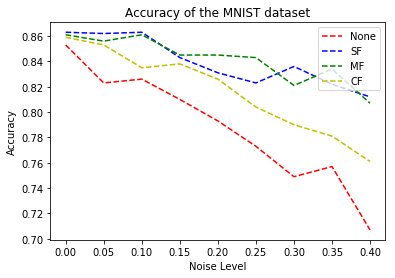

In [3]:
%run -i 'script.py'